# Employee Attrition

---
### Introduction
---

**Project Overview**

This project is aiaming at predicting if employees will leave the job (resign) or not, we are also trying to explainin the possible contributors towards the leaving of the job using ExplainableAI.


---
### Table of Contents
---
<a id="cont"></a>

- [1. Importing Packages](#one)
- [2. Loading Data](#two)
- [3. Exploratory Data Analysis (EDA)](#three)
- [4. Feature Engineering](#four)
- [5. Data Preprocessing](#five)
- [6. Model Training](#six)
- [7. Model Evaluation](#seven)
- [8. Model Explainability](#eight)
- [9. Conclusion](#nine)


<div style="color:white;
           display:fill;
           border-radius:10px;
           font-size:80%;
           font-family:cursive;
           letter-spacing:0.5px;
           background-color:#2f3452;
           color:white;
           font-family:cursive;
            padding:5px 5px 5px 5px;
           ">
<h2 style="text-align:font-weight: bold;">1. Importing Packages </h2>

In [1]:
# Libraries for Data Loading, Manipulation, and Visualization
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display, Image
from mpl_toolkits.mplot3d import Axes3D

import warnings
warnings.filterwarnings('ignore')

import statsmodels

<div style="color:white;
           display:fill;
           border-radius:10px;
           font-size:80%;
           font-family:cursive;
           letter-spacing:0.5px;
           background-color:#2f3452;
           color:white;
           font-family:cursive;
            padding:5px 5px 5px 5px;
           ">
<h2 style="text-align:font-weight: bold;"> 2. Loading Data </h2>

---
### Data used
---

- **Age**: Numerical feature representing the age of employees.
Gender: Categorical variable indicating employee gender (0 for female, 1 for male).
- **Years_at_Company**: Numerical feature indicating tenure at the company.
- **Satisfaction_Level**: Continuous score indicating job satisfaction.
- **Average_Monthly_Hours**: Numerical feature for average hours worked monthly.
- **Promotion_Last_5Years**: Binary feature indicating promotion status in the last five years.
- **Salary**: Numerical representation of employee salary.
- **Attrition**: Target variable indicating if the employee has left (0 for no, 1 for yes).
- **Department**: Categorical variable representing the department of the employee.
- **Job_Title**: Categorical variable for the job title.

In [2]:
from google.colab import files
uploaded = files.upload()

Saving employee_attrition_data.csv to employee_attrition_data.csv


In [3]:
df_employee = pd.read_csv('employee_attrition_data.csv')

<div style="color:white;
           display:fill;
           border-radius:10px;
           font-size:80%;
           font-family:cursive;
           letter-spacing:0.5px;
           background-color:#2f3452;
           color:white;
           font-family:cursive;
            padding:5px 5px 5px 5px;
           ">
<h2 style="text-align:font-weight: bold;"> 3. Exploratory Data Analysis (EDA)</h2>



</div>

---
### Data Inspection
---

In [4]:
df_employee

,Employee_ID,Age,Gender,Department,Job_Title,Years_at_Company,Satisfaction_Level,Average_Monthly_Hours,Promotion_Last_5Years,Salary,Attrition
0,0,27,Male,Marketing,Manager,9,0.586251,151,0,60132,0
1,1,53,Female,Sales,Engineer,10,0.261161,221,1,79947,0
2,2,59,Female,Marketing,Analyst,8,0.304382,184,0,46958,1
3,3,42,Female,Engineering,Manager,1,0.480779,242,0,40662,0
4,4,44,Female,Sales,Engineer,10,0.636244,229,1,74307,0
...,...,...,...,...,...,...,...,...,...,...,...
995,995,39,Female,HR,HR Specialist,3,0.377435,239,0,71403,0
996,996,50,Male,Engineering,Manager,1,0.431152,154,0,30181,1
997,997,52,Male,Engineering,Analyst,3,0.647102,206,0,64143,0
998,998,37,Female,HR,HR Specialist,2,0.304813,241,0,74383,1


In [5]:
df_employee.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Employee_ID            1000 non-null   int64  
 1   Age                    1000 non-null   int64  
 2   Gender                 1000 non-null   object 
 3   Department             1000 non-null   object 
 4   Job_Title              1000 non-null   object 
 5   Years_at_Company       1000 non-null   int64  
 6   Satisfaction_Level     1000 non-null   float64
 7   Average_Monthly_Hours  1000 non-null   int64  
 8   Promotion_Last_5Years  1000 non-null   int64  
 9   Salary                 1000 non-null   int64  
 10  Attrition              1000 non-null   int64  
dtypes: float64(1), int64(7), object(3)
memory usage: 86.1+ KB


In [6]:
df_employee.isnull().sum()

Employee_ID              0
Age                      0
Gender                   0
Department               0
Job_Title                0
Years_at_Company         0
Satisfaction_Level       0
Average_Monthly_Hours    0
Promotion_Last_5Years    0
Salary                   0
Attrition                0
dtype: int64

In [8]:
df_employee.nunique()

Employee_ID              1000
Age                        35
Gender                      2
Department                  5
Job_Title                   5
Years_at_Company           10
Satisfaction_Level       1000
Average_Monthly_Hours     100
Promotion_Last_5Years       2
Salary                    995
Attrition                   2
dtype: int64

---
### Descriptive Statistics Summary
---

In [7]:
# Descriptive Statistics Summary
df_employee_summary = df_employee.describe()
df_employee_summary

,Employee_ID,Age,Years_at_Company,Satisfaction_Level,Average_Monthly_Hours,Promotion_Last_5Years,Salary,Attrition
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,499.500000,42.205000,5.605000,0.505995,199.493000,0.486000,64624.980000,0.495000
std,288.819436,10.016452,2.822223,0.289797,29.631908,0.500054,20262.984333,0.500225
min,0.000000,25.000000,1.000000,0.001376,150.000000,0.000000,30099.000000,0.000000
25%,249.750000,33.000000,3.000000,0.258866,173.000000,0.000000,47613.500000,0.000000
50%,499.500000,43.000000,6.000000,0.505675,201.000000,0.000000,64525.000000,0.000000
75%,749.250000,51.000000,8.000000,0.761135,225.000000,1.000000,81921.000000,1.000000
max,999.000000,59.000000,10.000000,0.999979,249.000000,1.000000,99991.000000,1.000000


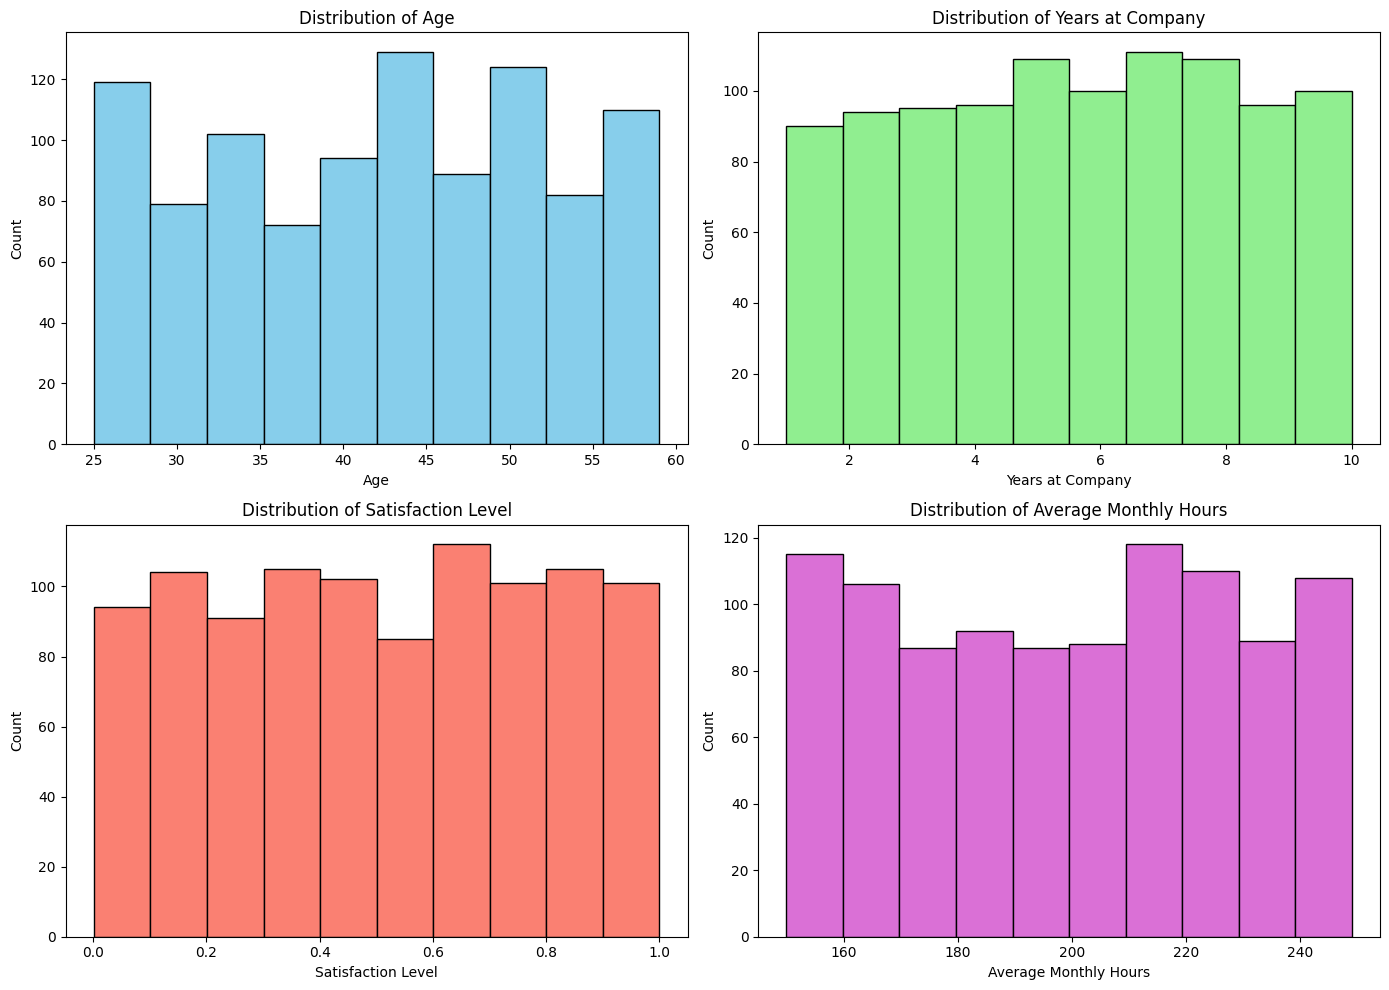

In [9]:
# Create subplots
fig, ax = plt.subplots(2, 2, figsize=(14, 10))

# Plot for Age
ax[0, 0].hist(df_employee['Age'], bins=10, color='skyblue', edgecolor='black')
ax[0, 0].set_title('Distribution of Age')
ax[0, 0].set_xlabel('Age')
ax[0, 0].set_ylabel('Count')

# Plot for Years_at_Company
ax[0, 1].hist(df_employee['Years_at_Company'], bins=10, color='lightgreen', edgecolor='black')
ax[0, 1].set_title('Distribution of Years at Company')
ax[0, 1].set_xlabel('Years at Company')
ax[0, 1].set_ylabel('Count')

# Plot for Satisfaction_Level
ax[1, 0].hist(df_employee['Satisfaction_Level'], bins=10, color='salmon', edgecolor='black')
ax[1, 0].set_title('Distribution of Satisfaction Level')
ax[1, 0].set_xlabel('Satisfaction Level')
ax[1, 0].set_ylabel('Count')

# Plot for Average_Monthly_Hours
ax[1, 1].hist(df_employee['Average_Monthly_Hours'], bins=10, color='orchid', edgecolor='black')
ax[1, 1].set_title('Distribution of Average Monthly Hours')
ax[1, 1].set_xlabel('Average Monthly Hours')
ax[1, 1].set_ylabel('Count')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

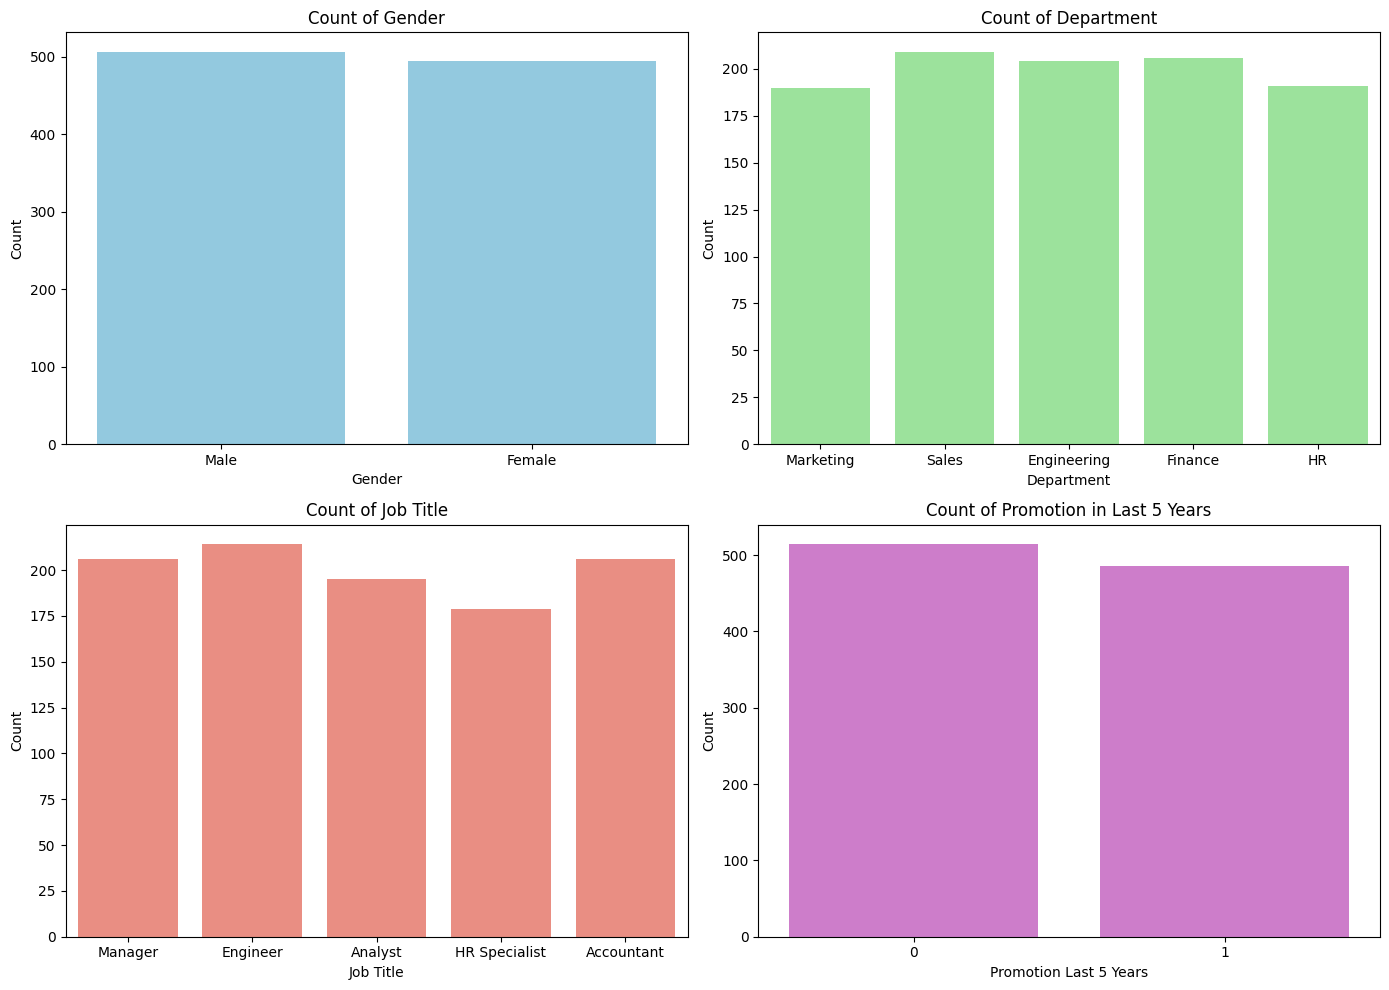

In [11]:
# Create subplots
fig, ax = plt.subplots(2, 2, figsize=(14, 10))

# Plot for Gender
sns.countplot(data=df_employee, x='Gender', ax=ax[0, 0], color='skyblue') # Use color='skyblue' instead of palette
ax[0, 0].set_title('Count of Gender')
ax[0, 0].set_xlabel('Gender')
ax[0, 0].set_ylabel('Count')

# Plot for Department
sns.countplot(data=df_employee, x='Department', ax=ax[0, 1], color='lightgreen') # Use color='lightgreen' instead of palette
ax[0, 1].set_title('Count of Department')
ax[0, 1].set_xlabel('Department')
ax[0, 1].set_ylabel('Count')

# Plot for Job_Title
sns.countplot(data=df_employee, x='Job_Title', ax=ax[1, 0], color='salmon') # Use color='salmon' instead of palette
ax[1, 0].set_title('Count of Job Title')
ax[1, 0].set_xlabel('Job Title')
ax[1, 0].set_ylabel('Count')

# Plot for Promotion_Last_5Years
sns.countplot(data=df_employee, x='Promotion_Last_5Years', ax=ax[1, 1], color='orchid') # Use color='orchid' instead of palette
ax[1, 1].set_title('Count of Promotion in Last 5 Years')
ax[1, 1].set_xlabel('Promotion Last 5 Years')
ax[1, 1].set_ylabel('Count')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

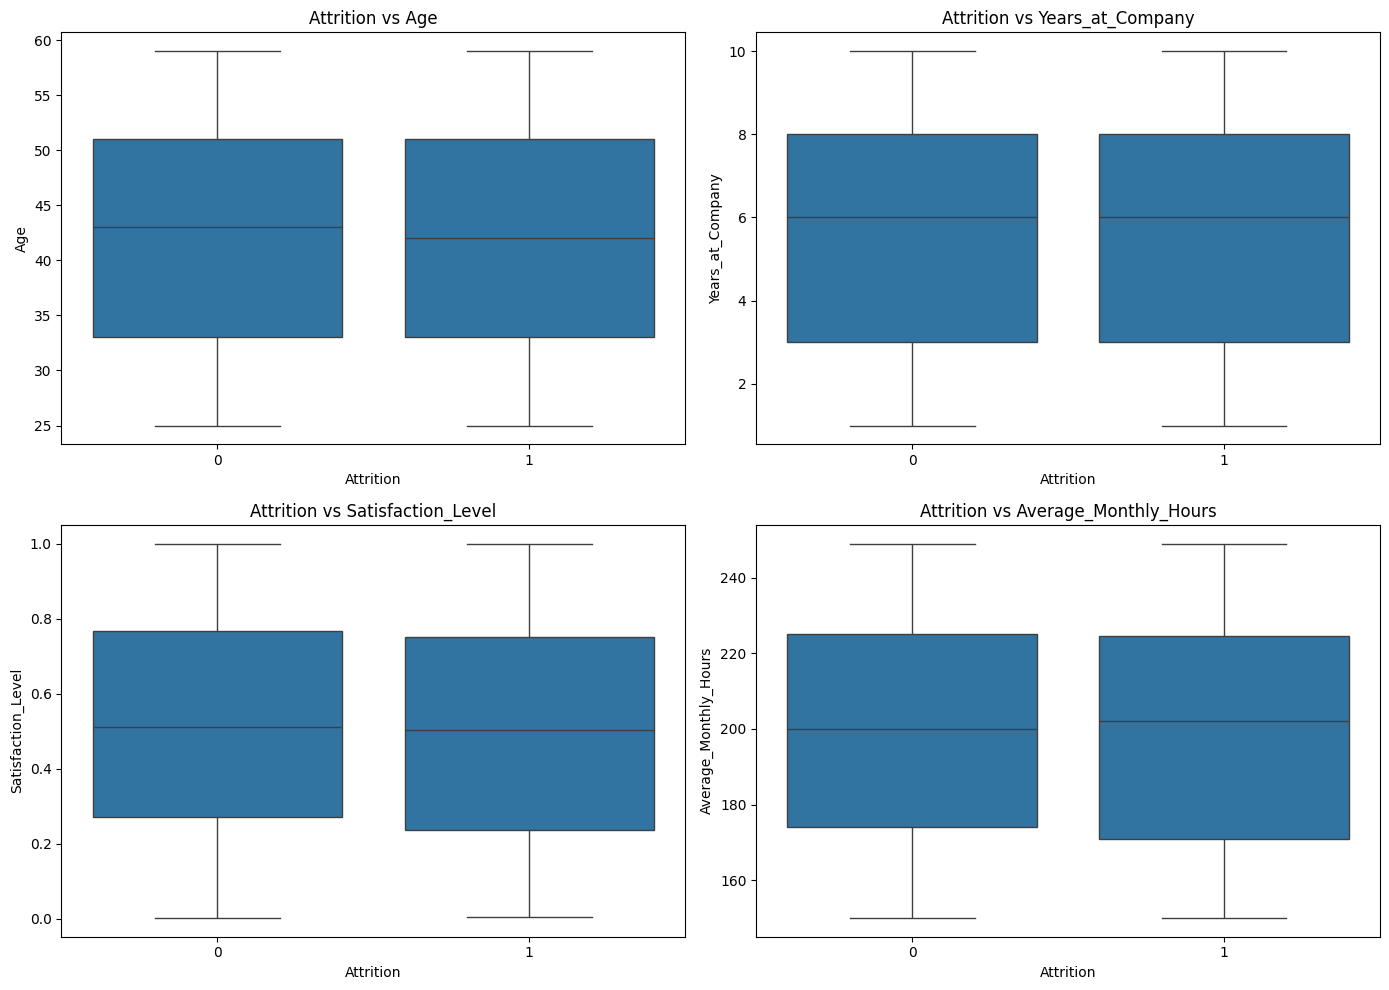

In [13]:
# Define numerical features
numerical_features = ['Age', 'Years_at_Company', 'Satisfaction_Level', 'Average_Monthly_Hours']

# Create subplots for Attrition vs Numerical Features
fig, ax = plt.subplots(2, 2, figsize=(14, 10))

# Plot for each numerical feature
for i, feature in enumerate(numerical_features):
    sns.boxplot(x='Attrition', y=feature, data=df_employee, ax=ax[i//2, i%2])
    ax[i//2, i%2].set_title(f'Attrition vs {feature}')

# Adjust layout
plt.tight_layout()
plt.show()

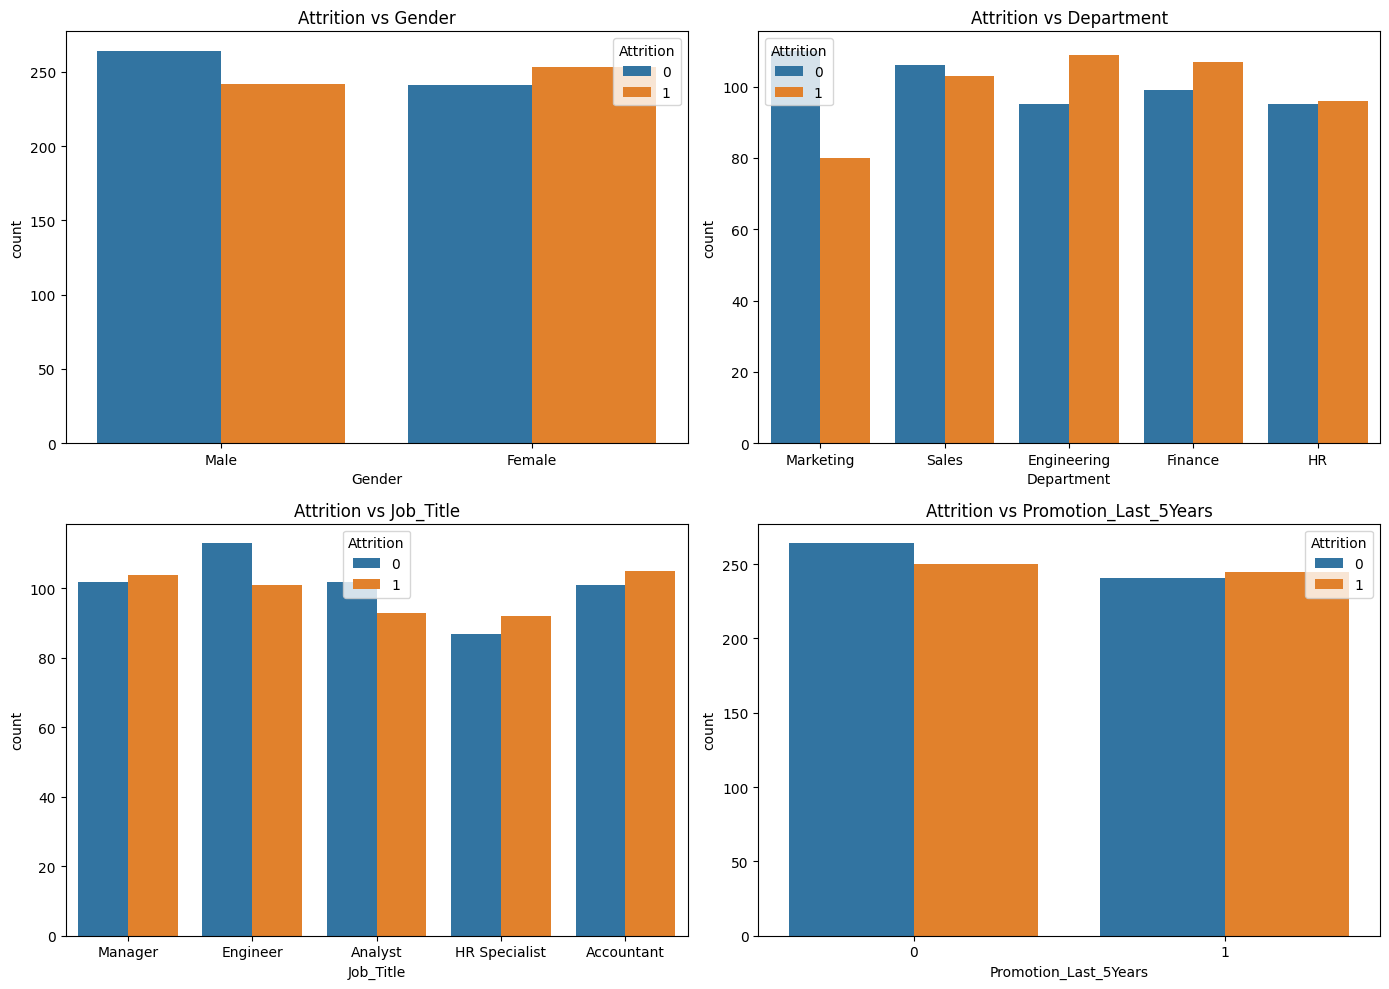

In [15]:
# Define numerical features
categorical_features = ['Gender', 'Department', 'Job_Title', 'Promotion_Last_5Years']

# Create subplots for Attrition vs Categorical Features
fig, ax = plt.subplots(2, 2, figsize=(14, 10))

# Plot for each categorical feature
for i, feature in enumerate(categorical_features):
    sns.countplot(x=feature, hue='Attrition', data=df_employee, ax=ax[i//2, i%2])
    ax[i//2, i%2].set_title(f'Attrition vs {feature}')

# Adjust layout
plt.tight_layout()
plt.show()

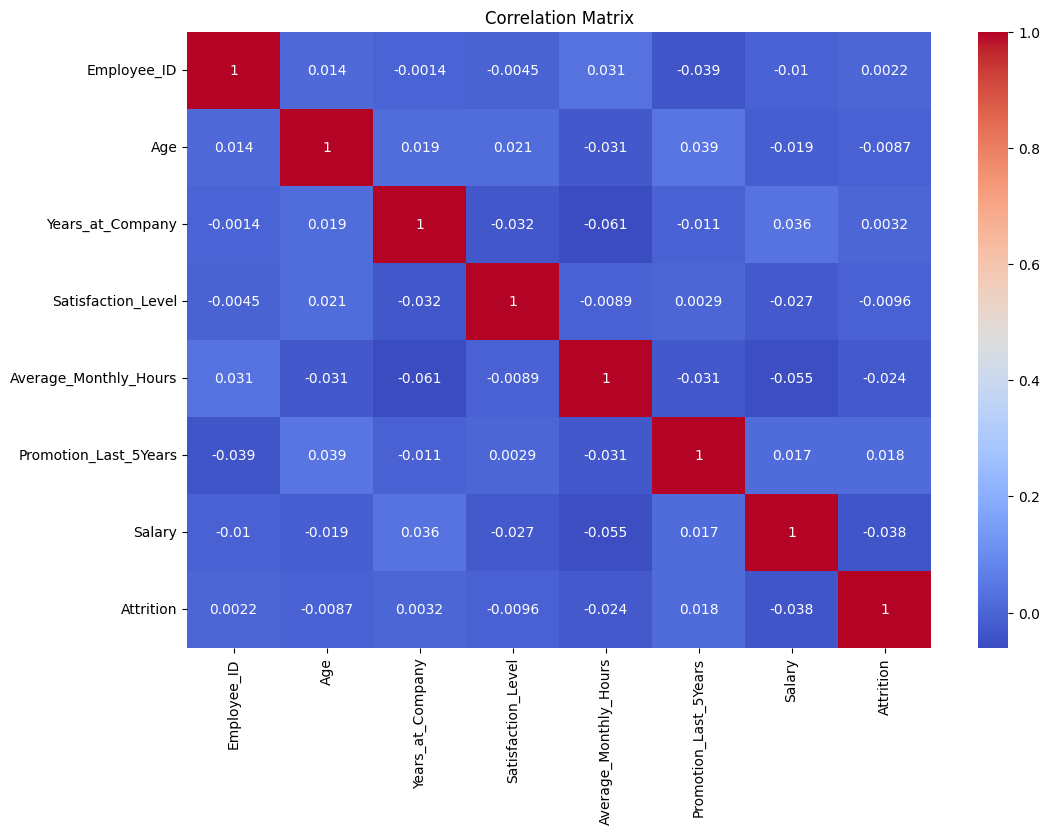

In [16]:
# Select only numerical columns before calculating correlation
numerical_df = df_employee.select_dtypes(include=['number'])

plt.figure(figsize=(12, 8))
sns.heatmap(numerical_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

<div style="color:white;
           display:fill;
           border-radius:10px;
           font-size:80%;
           font-family:cursive;
           letter-spacing:0.5px;
           background-color:#2f3452;
           color:white;
           font-family:cursive;
            padding:5px 5px 5px 5px;
           ">
<h2 style="text-align:font-weight: bold;"> 4. Feature Engineering</h2>



</div>

In [17]:
## importing packages
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display, Image
from mpl_toolkits.mplot3d import Axes3D

import statsmodels

import warnings
warnings.filterwarnings('ignore')

<div style="color:white;
           display:fill;
           border-radius:10px;
           font-size:80%;
           font-family:cursive;
           letter-spacing:0.5px;
           background-color:#2f3452;
           color:white;
           font-family:cursive;
            padding:5px 5px 5px 5px;
           ">
<h2 style="text-align:font-weight: bold;">5.Data Preprocessing</h2>



</div>

* Gender Mapping

In [18]:
df_employee = df_employee.drop(columns=['Employee_ID'])

In [19]:
gender_mapping = {'Male': 0, 'Female': 1}
df_employee['Gender'] = df_employee['Gender'].map(gender_mapping)

* One-Hot Encoding

In [26]:
# One-Hot Encoding for Department and Job_Title
df_employee = pd.get_dummies(df_employee, columns=['Department', 'Job_Title'], prefix=['Dept', 'Job'])

KeyError: "None of [Index(['Department', 'Job_Title'], dtype='object')] are in the [columns]"

In [23]:
df_employee.head()

,Age,Gender,Years_at_Company,Satisfaction_Level,Average_Monthly_Hours,Promotion_Last_5Years,Salary,Attrition,Dept_Engineering,Dept_Finance,Dept_HR,Dept_Marketing,Dept_Sales,Job_Accountant,Job_Analyst,Job_Engineer,Job_HR Specialist,Job_Manager
0,27,0,9,0.586251,151,0,60132,0,False,False,False,True,False,False,False,False,False,True
1,53,1,10,0.261161,221,1,79947,0,False,False,False,False,True,False,False,True,False,False
2,59,1,8,0.304382,184,0,46958,1,False,False,False,True,False,False,True,False,False,False
3,42,1,1,0.480779,242,0,40662,0,True,False,False,False,False,False,False,False,False,True
4,44,1,10,0.636244,229,1,74307,0,False,False,False,False,True,False,False,True,False,False


In [28]:
import pandas as pd

# Convert Boolean representation to binary (0s and 1s)
# Sample DataFrame
data = pd.DataFrame({
    'Age': [27, 53, 59, 42, 44],
    'Gender': [0, 1, 1, 1, 1],
    'Years_at_Company': [9, 10, 8, 1, 10],
    'Satisfaction_Level': [0.586251, 0.261161, 0.304382, 0.480779, 0.636244],
    'Average_Monthly_Hours': [151, 221, 184, 242, 229],
    'Promotion_Last_5Years': [0, 1, 0, 0, 1],
    'Salary': [60132, 79947, 46958, 40662, 74307],
    'Attrition': [0, 0, 1, 0, 0],
    'Dept_Engineering': [False, False, False, True, False],
    'Dept_Finance': [False, False, False, False, False],
    'Dept_HR': [False, False, False, False, False],
    'Dept_Marketing': [True, False, True, False, False],
    'Dept_Sales': [False, True, False, False, True],
    'Job_Accountant': [False, False, False, False, False],
    'Job_Analyst': [False, False, True, False, False],
    'Job_Engineer': [False, True, False, False, True],
    'Job_HR Specialist': [False, False, False, False, False],
    'Job_Manager': [True, False, False, True, False]
})

# Convert True/False to 1/0
bool_columns = ['Dept_Engineering', 'Dept_Finance', 'Dept_HR', 'Dept_Marketing', 'Dept_Sales',
                'Job_Accountant', 'Job_Analyst', 'Job_Engineer', 'Job_HR Specialist', 'Job_Manager']

data[bool_columns] = data[bool_columns].astype(int)

print(data)

   Age  Gender  Years_at_Company  Satisfaction_Level  Average_Monthly_Hours  \
0   27       0                 9            0.586251                    151   
1   53       1                10            0.261161                    221   
2   59       1                 8            0.304382                    184   
3   42       1                 1            0.480779                    242   
4   44       1                10            0.636244                    229   

   Promotion_Last_5Years  Salary  Attrition  Dept_Engineering  Dept_Finance  \
0                      0   60132          0                 0             0   
1                      1   79947          0                 0             0   
2                      0   46958          1                 0             0   
3                      0   40662          0                 1             0   
4                      1   74307          0                 0             0   

   Dept_HR  Dept_Marketing  Dept_Sales  Job_Accoun

In [29]:
df_employee = pd.concat([df_employee, data], axis=1)

In [30]:
df_employee.head()

,Age,Gender,Years_at_Company,Satisfaction_Level,Average_Monthly_Hours,Promotion_Last_5Years,Salary,Attrition,Dept_Engineering,Dept_Finance,...,Dept_Engineering,Dept_Finance,Dept_HR,Dept_Marketing,Dept_Sales,Job_Accountant,Job_Analyst,Job_Engineer,Job_HR Specialist,Job_Manager
0,27,0,9,0.586251,151,0,60132,0,False,False,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,53,1,10,0.261161,221,1,79947,0,False,False,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,59,1,8,0.304382,184,0,46958,1,False,False,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
3,42,1,1,0.480779,242,0,40662,0,True,False,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,44,1,10,0.636244,229,1,74307,0,False,False,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [31]:
# Sample DataFrame
data = pd.DataFrame({
    'Age': [27, 53, 59, 42, 44],
    'Gender': [0, 1, 1, 1, 1],
    'Years_at_Company': [9, 10, 8, 1, 10],
    'Satisfaction_Level': [0.586251, 0.261161, 0.304382, 0.480779, 0.636244],
    'Average_Monthly_Hours': [151, 221, 184, 242, 229],
    'Promotion_Last_5Years': [0, 1, 0, 0, 1],
    'Salary': [60132, 79947, 46958, 40662, 74307],
    'Attrition': [0, 0, 1, 0, 0],
    'Dept_Engineering': [False, False, False, True, False],
    'Dept_Finance': [False, False, False, False, False],
    'Dept_HR': [False, False, False, False, False],
    'Dept_Marketing': [True, False, True, False, False],
    'Dept_Sales': [False, True, False, False, True],
    'Job_Accountant': [False, False, False, False, False],
    'Job_Analyst': [False, False, True, False, False],
    'Job_Engineer': [False, True, False, False, True],
    'Job_HR Specialist': [False, False, False, False, False],
    'Job_Manager': [True, False, False, True, False]
})

# Convert True/False to 1/0
bool_columns = ['Dept_Engineering', 'Dept_Finance', 'Dept_HR', 'Dept_Marketing', 'Dept_Sales',
                'Job_Accountant', 'Job_Analyst', 'Job_Engineer', 'Job_HR Specialist', 'Job_Manager']

data[bool_columns] = data[bool_columns].astype(int)

# Remove any duplicate columns (if exists)
data = data.loc[:,~data.columns.duplicated()]

print(data)

   Age  Gender  Years_at_Company  Satisfaction_Level  Average_Monthly_Hours  \
0   27       0                 9            0.586251                    151   
1   53       1                10            0.261161                    221   
2   59       1                 8            0.304382                    184   
3   42       1                 1            0.480779                    242   
4   44       1                10            0.636244                    229   

   Promotion_Last_5Years  Salary  Attrition  Dept_Engineering  Dept_Finance  \
0                      0   60132          0                 0             0   
1                      1   79947          0                 0             0   
2                      0   46958          1                 0             0   
3                      0   40662          0                 1             0   
4                      1   74307          0                 0             0   

   Dept_HR  Dept_Marketing  Dept_Sales  Job_Accoun

* Normalizing and Scaling the Features

In [33]:
from sklearn.preprocessing import StandardScaler

# Define the features and target
features = data.drop(['Attrition'], axis=1)
target = data['Attrition']

# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler on the features and transform them
features_scaled = scaler.fit_transform(features)

# Convert the scaled features back to a DataFrame
features_scaled_df = pd.DataFrame(features_scaled, columns=features.columns)

print(features_scaled_df.head())

        Age  Gender  Years_at_Company  Satisfaction_Level  \
0 -1.651446    -2.0          0.413919            0.889229   
1  0.733976     0.5          0.709575           -1.292707   
2  1.284458     0.5          0.118262           -1.002616   
3 -0.275241     0.5         -1.951331            0.181323   
4 -0.091747     0.5          0.709575            1.224771   

   Average_Monthly_Hours  Promotion_Last_5Years    Salary  Dept_Engineering  \
0              -1.631759              -0.816497 -0.017783              -0.5   
1               0.467931               1.224745  1.291151              -0.5   
2              -0.641905              -0.816497 -0.888027              -0.5   
3               1.097838              -0.816497 -1.303926               2.0   
4               0.707895               1.224745  0.918585              -0.5   

   Dept_Finance  Dept_HR  Dept_Marketing  Dept_Sales  Job_Accountant  \
0           0.0      0.0        1.224745   -0.816497             0.0   
1           0.

* Train-Test Split

In [37]:
from sklearn.model_selection import train_test_split


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

print(X_train.shape, X_test.shape)
print(X_train.shape, X_test.shape)

(4, 17) (1, 17)
(4, 17) (1, 17)


<div style="color:white;
           display:fill;
           border-radius:10px;
           font-size:80%;
           font-family:cursive;
           letter-spacing:0.5px;
           background-color:#2f3452;
           color:white;
           font-family:cursive;
            padding:5px 5px 5px 5px;
           ">
<h2 style="text-align:font-weight: bold;">6. Building Predictive Machine Learning Models</h2>



</div>

---
### Results
---

In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize the models
log_reg = LogisticRegression()
rf = RandomForestClassifier()
xgb = XGBClassifier()

# Train and evaluate Logistic Regression
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)
print("Logistic Regression")
print("Accuracy:", accuracy_score(y_test, y_pred_log_reg))
print(classification_report(y_test, y_pred_log_reg))

# Train and evaluate Random Forest
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print("Random Forest")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

# Train and evaluate XGBoost
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)
print("XGBoost")
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))

Logistic Regression
Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1

    accuracy                           1.00         1
   macro avg       1.00      1.00      1.00         1
weighted avg       1.00      1.00      1.00         1

Random Forest
Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1

    accuracy                           1.00         1
   macro avg       1.00      1.00      1.00         1
weighted avg       1.00      1.00      1.00         1

XGBoost
Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1

    accuracy                           1.00         1
   macro avg       1.00      1.00      1.00         1
weighted avg       1.00      1.00      1.00         1



---
### Explainability & Conclusion
---

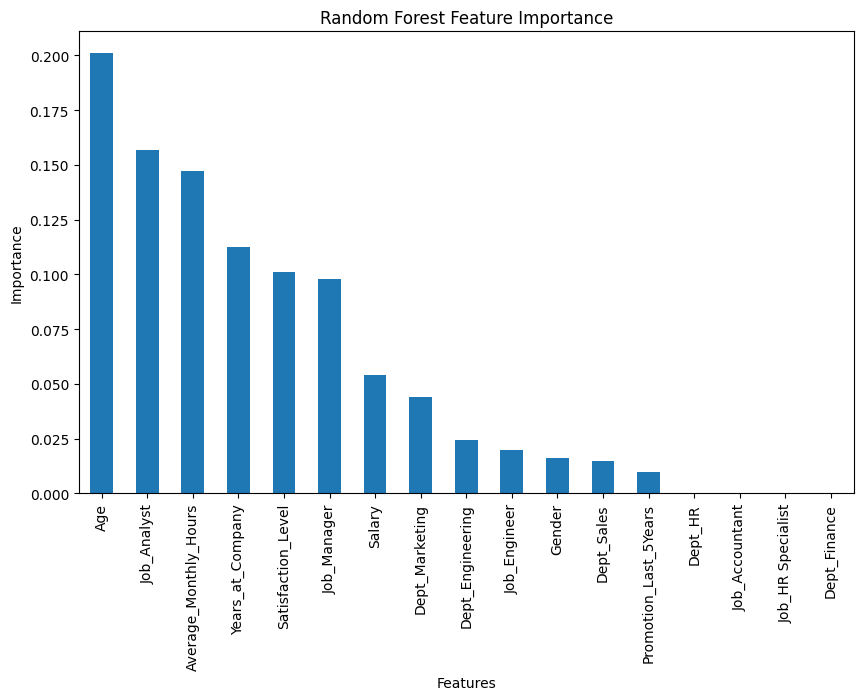

In [44]:

# Calculate feature importance for Random Forest
rf_importance = pd.Series(rf.feature_importances_, index=X_train.columns)
rf_importance = rf_importance.sort_values(ascending=False)

# Plotting feature importance
plt.figure(figsize=(10, 6))
rf_importance.plot(kind='bar', title='Random Forest Feature Importance')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()

### Random Forest
* "Age" is the highest-ranked feature, it suggests that employee age significantly influences attrition rates. This could indicate that younger employees might be more likely to leave the company, or perhaps age correlates with other factors like "Average_Montly_Hors" affecting job satisfaction and retention.

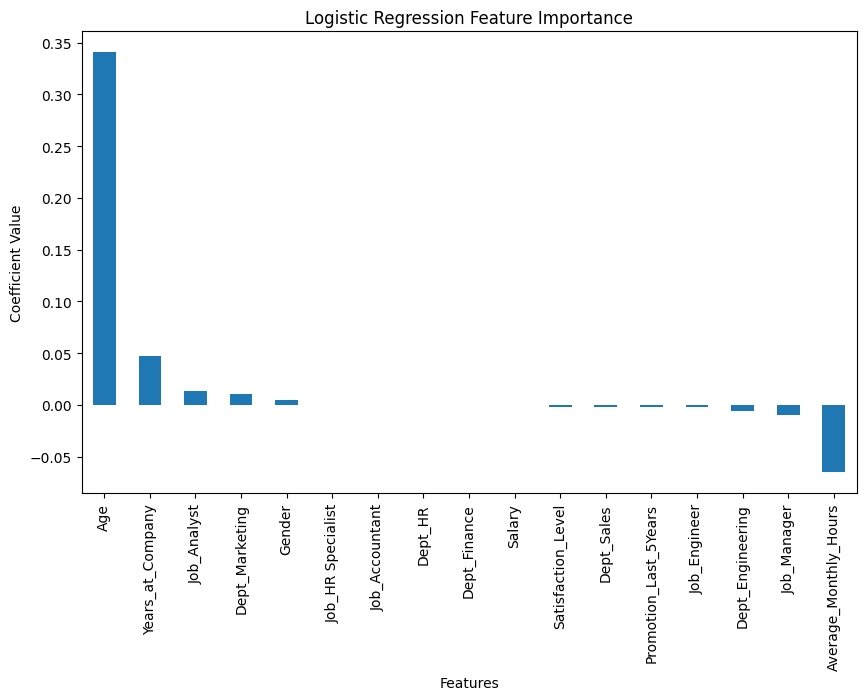

In [45]:

# Get the coefficients from the Logistic Regression model
log_reg_coef = pd.Series(log_reg.coef_[0], index=X_train.columns)
log_reg_coef = log_reg_coef.sort_values(ascending=False)

# Plotting feature importance
plt.figure(figsize=(10, 6))
log_reg_coef.plot(kind='bar', title='Logistic Regression Feature Importance')
plt.xlabel('Features')
plt.ylabel('Coefficient Value')
plt.show()

### Logistic Regression
* Features like "age" and "years at company" with higher absolute coefficients significantly influence the prediction of attrition. Positive coefficients indicate an increase in attrition likelihood.

* Features like Average Montly Hours have lower impact on attrition, due to negative coefficients, this seems to be decrease in attrition.

